<img src="res/itm_logo.jpg" width="300px">

## Inteligencia Artificial - IAI84
### Instituto Tecnológico Metropolitano
#### Pedro Atencio Ortiz - 2018

Este material ha sido construido utilizando material de los libros:
<ul>
    <li>Artificial Intelligence: A modern approach.</li>
    <li>Artificial Intelligence: Foundations of Computational Agents. Second Edition. (<a href="http://artint.info/2e/html/ArtInt2e.html">link</a>).</li>
</ul>

<hr>
## Módulo 2: Solución de problemas mediante búsqueda
<img src="res/problem_solving.gif" width="400px">
## Agenda:
<font size="4">
<ol>
<li>Búsqueda informada o heurística</li>
<li>Estrategias de búsqueda informada o heurística</li>
    <ol>
    <li>Greedy Search o Heuristic Depth-First Search</li>
    <li>Best First Search</li>
    <li>A-Star</li>
    </ol>
<li>A-Star - Heurísticas admisibles y consistentes</li>
</ol>
</font>

<hr>
# Recordemos!
## <font color="red">Formulación de un problema de tipo determinista</font>
De manera formal, <font color="red">un problema se define mediante 4 elementos</font>:
<ul>
    <li><font color="blue"><b>Estado inicial</b></font>: Por ejemplo, "en Arad."</li>
    <br>
    <li><font color="blue"><b>Función de secuencia o sucesión</b> $S(x)$</font>: Retorna pares de acciones-estados a partir de un estado x.</li>
    <br>
    $$S(Arad)=\left \{ \left \langle Arad \rightarrow Zerind, Zerind \right \rangle,... \right \}$$
    <br>
    <li><font color="blue"><b>Objetivo:</b></font>, puede ser:
        <ul>
            <li><font color="green">Explícito</font>: Ejemplo, $$x = "Bucharest"$$</li>
            <br>
            <li><font color="green">Implícito</font>: Ejemplo, $$Limpio(x)$$</li>
        </ul>
    </li>
    <br>
    <li><font color="blue"><b>Costo de ruta(aditivo)</b></font>: Por ejemplo, la suma de las distancias o el número de acciones ejecutadas.</li>
    <br>
        <li>Una <font color="blue"><b>solución</b></font>: una secuencia que conduce del estado inicial al estado objetivo.</li>
</ul>

##  <font color="red"> Algoritmo básico de búsqueda </font>
<img src="res/tree_search.png" width="700px">
<center><i>Funcion básica de búsqueda.</i></center>
<br>

<hr>
# 1. Búsqueda informada o heurística
La principal idea de este tipo de estrategias de búsqueda, consiste en encontrar soluciones de forma inteligente a diferencia de los métodos de búsqueda ciega explorados anteriormente.

<img src="res/hsearch/be_smart.png" width="300px">
<br>
### <font color="red"> ¿Y cómo logramos esto? </font>
Expandiendo solo los nodos más prometedores, utilizando para ello, una función heurística que permita estimar el costo desde el estado actual al objetivo.

<hr>
## Algunas propiedades de la búsqueda heurística
<br>
<font size=3>
<ul>
    <li>Utiliza una función heurística: <font color="blue" size=5>$h(n)$</font></li>
    <br>
    <li>Esta función toma un nodo <font color="blue"><i>n</i></font> y retorna un valor no-negativo el cual es una estimación del costo de ruta desde el nodo <font color="blue"><i>n</i></font> hasta el nodo objetivo.</li>
    <br>
    <li>La función heurística <font color="blue"><i>h(n)</i></font> es una subestimación si  no existe una ruta desde <font color="blue"><i>n</i></font> al objetivo que cueste menos que <font color="blue"><i>h(n)</i></font>.</li>
    <br>
    <li>La función heurística es una forma de brindar información a la búsqueda, sobre la dirección hacia el objetivo.</li>
    <br>
    <li>Esta función debe utilizar información que pueda ser obtenida a partir del espacio de estados.</li>
    <br>
    <li>Una forma de construir una función heurística, consiste estimar un costo en un problema más simple y utilizar dicho costo como <font color="blue"><i>h(n)</i></font>.</li>
</ul>
</font>

<hr>
# Algunos ejemplos de funciones heurísticas
<ul>
    <li>Si los nodos son puntos en el espacio Euclídeo y el costo es la distancia, <font color="blue"><i>h(n)</i></font> puede ser la distancia en línea recta desde <font color="blue"><i>n</i></font> al objetivo.</li>
    <img src="res/hsearch/rumanian_map_hn.png" width="600px">
    <li>En el ejemplo del 8-puzzle podemos utilizar como heurística el número de piezas incorrectamente posicionadas, o la distancia de Manhattan entendida como la suma de casillas que faltan para que las piezas estén correctamente posicionadas.</li>
    <img src="res/hsearch/8_puzzle.png" width="300px">
</ul>

<hr>
## Analicemos
<ol>
<li>En el módulo anterior, analizamos una estrategia de búsqueda no-informada conocida como UCS (Uniform Cost Search). Esta estrategia utiliza un costo estimado para ir de un nodo i a un nodo j. <b>¿Por qué no se considera entonces UCS como búsqueda heurística?</b></li>
<img src="res/ucs_example.png" width="300px">
</ol>


# A. Greedy Search o Heuristic Depth-First Search
<ul>
    <li>Idea: Se explorar los nodos hijos secuencialmente ordenados de acuerdo a la función <font color="blue">h</font>.</li>
    <li>Expande todos los nodos que "parezcan" estar más cerca del objetivo.</li>
    <li>Se implementa mediante una lista ordenada por <font color="blue">h</font> pero teniendo prioridad los hijos de $n$.</li>
</ul>
<img src="res/hsearch/map_h.png" width=600>

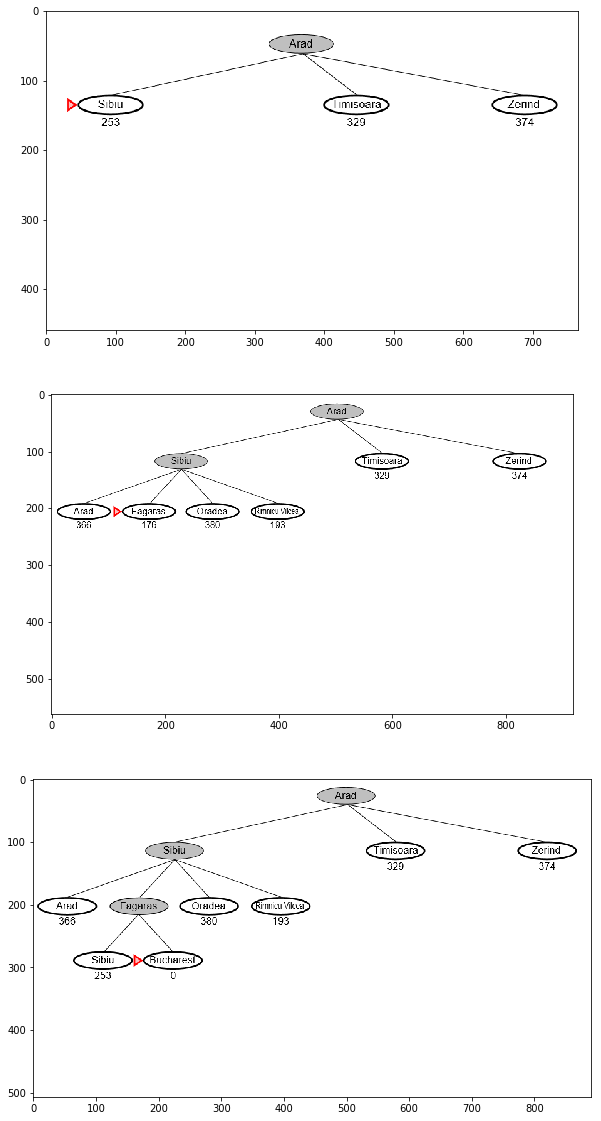

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dir_path = "res/hsearch/"

fig, arreglo_plots = plt.subplots(3,1, figsize=(10, 20))
I1 = mpimg.imread(dir_path+"greedy_1.png")
arreglo_plots[0].imshow(I1, cmap="gray")
I2 = mpimg.imread(dir_path+"greedy_2.png")
arreglo_plots[1].imshow(I2, cmap="gray")
I3 = mpimg.imread(dir_path+"greedy_3.png")
arreglo_plots[2].imshow(I3, cmap="gray")

<hr>
## B. Best-First Search
<ul>
    <li>Idea: Seleccionar la ruta cuyo estado final esté más cerca del objetivo, de acuerdo a la función heurística.</li>
    <li>Best-FS selecciona la ruta en la frontera de búsqueda con el menor valor de <font color="blue">h.</font></li>
    <li>La frontera se representa como una lista ordenada en forma descendente por <font color="blue">h.</font></li>
<img src="res/hsearch/loop_bfs.png" width="500px">
<center>¿Qué pasa ante ciclos infinitos?</center>
<br>
<li>Expandir los nodos con mayor valor heurístico <b>que no hayan sido expandidos previamente.</b></li>
</ul>

In [1]:
'''
Funciones utilitarias.
Author: Pedro Atencio
Copyright 2017
'''

import numpy as np
import copy


def buscarNodo(node, listCLOSED):
    for i in range(len(listCLOSED)):
        if(listCLOSED[i].tablero == node.tablero):
            return 1
    return 0

class listaPrioridad():

    def __init__(self):
        self.list = []

    # Esta funcion recibe un nodo y lo inserta en la lista de la clase
    # teniendo la funcion de evaluacion como criterio de orden de menor
    #a mayor.
    def insert(self, nodo):
        i = 0
        for i in range(len(self.list)):
            if(nodo.funcEval < self.list[i].funcEval):
                break
            i += 1

        self.list.insert(i, nodo)

# Funcion generarNodosHijos
# Esta funcion genera todos lo movimientos posibles a partir de un nodo raiz,
# para el problema de las N-Reinas.
# Entradas:
#    nodo_raiz: Nodo del cual se derivaran los posibles movimientos.
#    listaOPEN: Lista principal del programa en la cual se encuentran
#    organizados por prioridad, los nodos que hacen falta por visitar.
# Salida:
#    nodos_hijos: Lista con los hijos generados a partir del nodo de entrada.

def generarNodosHijos(nodo_raiz, listaOPEN, listaCLOSED):
    listaCLOSED.append(nodo_raiz)
    tablero = nodo_raiz.tablero
    # Recorremos las 4 filas (tablero 4x4)
    for i in range(4):
        # Recorremos las 4 columas
        for j in range(4):
            if(tablero[i][j] == 1):
                if(j == 0):
                    #generar 1 hijo
                    hijo = nodo_NReinas(tablero)
                    hijo.tablero[i] = [0, 1, 0, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    break
                elif(j == 1):
                    #generar 2 hijos
                    hijo = nodo_NReinas(tablero)
                    hijo.tablero[i] = [1, 0, 0, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    hijo = nodo_NReinas(tablero)
                    hijo.tablero[i] = [0, 0, 1, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    break
                elif(j == 2):
                    #generar 2 hijos
                    hijo = nodo_NReinas(tablero)
                    hijo.tablero[i] = [0, 1, 0, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    hijo = nodo_NReinas(tablero)
                    hijo.tablero[i] = [0, 0, 0, 1]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    break

                else:
                    #generar 1 hijo
                    hijo = nodo_NReinas(tablero)
                    hijo.tablero[i] = [0, 0, 1, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)
                    break

In [2]:
'''
Best-First Search for 4-queens problem.
Author: Pedro Atencio
Copyright 2017
'''

class nodo_NReinas():

    def __init__(self, tablero):
        self.tablero = copy.deepcopy(tablero)
        self.funcEval = 0

    def calc_funcEval(self):
        self.calc_conflictos()
        self.funcEval = self.h
        
    def calc_conflictos(self):
        #contador de conflictos
        conflictos = 0

        # 1. Encontrar las reinas en el tablero
        lista_reinas = []
        for i in range(4):
            for j in range(4):
                if(self.tablero[i][j] == 1):
                    lista_reinas.append([i,j])

        # 2. recorremos las reinas encontradas y verificamos los conflictos (6).
        # Los conflictos pueden ser arriba-abajo y 4 diagonales
        for i in range(len(lista_reinas)):
            fils = lista_reinas[i][0]
            cols = lista_reinas[i][1]

            #conflictos en el tablero, hacia abajo
            for y in range(fils + 1, 4):
                if(self.tablero[y][cols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, hacia arriba
            for y in range(0, fils - 1):
                if(self.tablero[y][cols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal izquerda superior
            tfils = fils
            tcols = cols
            while(tfils > 0 and tcols > 0):
                tfils -= 1
                tcols -= 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal derecha inferior
            tfils = fils
            tcols = cols
            while(tfils < 3 and tcols < 3):
                tfils += 1
                tcols += 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal derecha superior
            tfils = fils
            tcols = cols
            while(tfils > 0 and tcols < 3):
                tfils -= 1
                tcols += 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal izquierda inferior
            tfils = fils
            tcols = cols
            while(tfils < 3 and tcols > 0):
                tfils += 1
                tcols -= 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break

            self.h = conflictos
###############################################################################
# BEST-FS para el problema de las 4-Reinas
###############################################################################
def best_fs(nodo_raiz):
    expand_counter = 0 #contador
    
    listaOPEN = listaPrioridad()
    listaCLOSED = []

    listaOPEN.insert(nodo_raiz)

    while(len(listaOPEN.list) > 0):
        nodo = listaOPEN.list.pop(0)
        nodo.calc_conflictos()
        #print(nodo.tablero)
        #cero conflictos

        print "tablero: ", nodo.tablero, "funcion de evaluacion (f = h): ", nodo.h

        if(nodo.h == 0):
            print("se encontro una solucion")
            print(nodo.tablero, nodo.h)
            print "numero de expansiones del arbol: "+str(expand_counter)
            return
        
        expand_counter += 1
        generarNodosHijos(nodo, listaOPEN, listaCLOSED)


tablero_inicial = [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]]
nodo_root = nodo_NReinas(tablero_inicial)
best_fs(nodo_root)

tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h):  5
tablero:  [[0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h):  5
tablero:  [[0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h):  4
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0]] funcion de evaluacion (f = h):  5
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]] funcion de evaluacion (f = h):  4
tablero:  [[0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h):  5
tablero:  [[0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h):  5
tablero:  [[0, 1, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h):  5
tablero:  [[0, 1, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h):  1
tablero:  [[1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f

<hr>
# C. A* Search
La principal idea de la estrategia A-Star, consiste en considerar el costo del camino o ruta actualmente explorado, en conjunto con la función heurística.
<br><br>
En este caso, se utiliza un función de evaluación compuesta:
<font color="blue" size=5>$f(n)=g(n)+h(n)$</font>
<ol>
<li><font color="red" size=3>$g(n)$</font>: costo de la ruta hasta el estado $n$</li>
<li><font color="red" size=3>$h(n)$</font>: costo de la ruta desde el estado $n$ hasta el objetivo.</li>
<li><font color="red" size=3>$f(n)$</font>: costo total estimado desde el estado $n$ hasta el objetivo.</li>
</ol>
<img src="res/hsearch/evaluation_function.png">

<hr>
<font size=4 color="blue">Se puede decir que A-star es una combinación de las estrategias UCS y BFS.</font>
<center><img src="res/hsearch/astar_search.png" width=600><center>

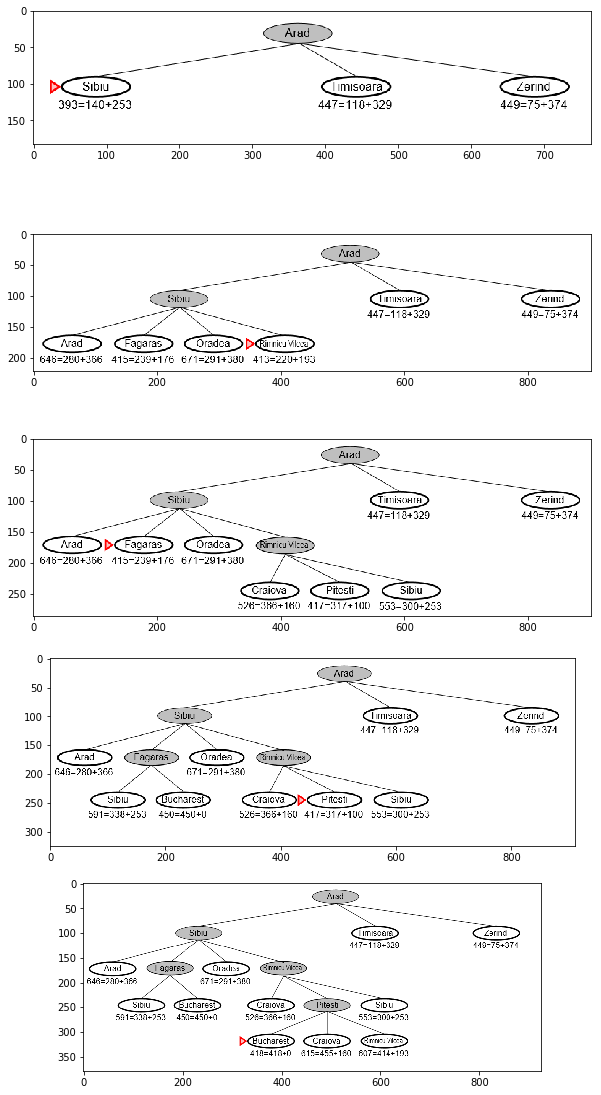

In [6]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

dir_path = "res/hsearch/"

fig, arreglo_plots = plt.subplots(5,1, figsize=(10, 20))
I1 = mpimg.imread(dir_path+"astar_1.png")
arreglo_plots[0].imshow(I1, cmap="gray")
I2 = mpimg.imread(dir_path+"astar_2.png")
arreglo_plots[1].imshow(I2, cmap="gray")
I3 = mpimg.imread(dir_path+"astar_3.png")
arreglo_plots[2].imshow(I3, cmap="gray")
I4 = mpimg.imread(dir_path+"astar_4.png")
arreglo_plots[3].imshow(I4, cmap="gray")
I5 = mpimg.imread(dir_path+"astar_5.png")
arreglo_plots[4].imshow(I5, cmap="gray")

In [3]:
# Funcion generarNodosHijos
# Esta funcion genera todos lo movimientos posibles a partir de un nodo raiz,
# para el problema de las N-Reinas.
# Entradas:
#    nodo_raiz: Nodo del cual se derivaran los posibles movimientos.
#    listaOPEN: Lista principal del programa en la cual se encuentran
#    organizados por prioridad, los nodos que hacen falta por visitar.
# Salida:
#    nodos_hijos: Lista con los hijos generados a partir del nodo de entrada.

def generarNodosHijos(nodo_raiz, listaOPEN, listaCLOSED):
    listaCLOSED.append(nodo_raiz)
    tablero = nodo_raiz.tablero
    # Recorremos las 4 filas (tablero 4x4)
    for i in range(4):
        # Recorremos las 4 columas
        for j in range(4):
            if(tablero[i][j] == 1):
                if(j == 0):
                    #generar 1 hijo
                    hijo = nodo_NReinas(tablero, nodo_raiz.g+1)
                    hijo.tablero[i] = [0, 1, 0, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    break
                elif(j == 1):
                    #generar 2 hijos
                    hijo = nodo_NReinas(tablero, nodo_raiz.g+1)
                    hijo.tablero[i] = [1, 0, 0, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    hijo = nodo_NReinas(tablero, nodo_raiz.g+1)
                    hijo.tablero[i] = [0, 0, 1, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    break
                elif(j == 2):
                    #generar 2 hijos
                    hijo = nodo_NReinas(tablero, nodo_raiz.g+1)
                    hijo.tablero[i] = [0, 1, 0, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    hijo = nodo_NReinas(tablero, nodo_raiz.g+1)
                    hijo.tablero[i] = [0, 0, 0, 1]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)

                    break

                else:
                    #generar 1 hijo
                    hijo = nodo_NReinas(tablero, nodo_raiz.g+1)
                    hijo.tablero[i] = [0, 0, 1, 0]
                    if(not(buscarNodo(hijo, listaCLOSED))):
                        hijo.calc_funcEval()
                        listaOPEN.insert(hijo)
                    break

In [4]:
'''
A-star Search for 4-queens problem.
Author: Pedro Atencio
Copyright 2017
'''

import numpy as np
import copy

class nodo_NReinas():

    def __init__(self, tablero, g):
        self.tablero = copy.deepcopy(tablero)
        self.funcEval = 0
        self.g = g # Costo: profundidad del arbol. A mayor profundidad mayor costo.

    def calc_conflictos(self):
        #contador de conflictos
        conflictos = 0

        # 1. Encontrar las reinas en el tablero
        lista_reinas = []
        for i in range(4):
            for j in range(4):
                if(self.tablero[i][j] == 1):
                    lista_reinas.append([i,j])

        # 2. recorremos las reinas encontradas y verificamos los conflictos (6).
        # Los conflictos pueden ser arriba-abajo y 4 diagonales
        for i in range(len(lista_reinas)):
            fils = lista_reinas[i][0]
            cols = lista_reinas[i][1]

            #conflictos en el tablero, hacia abajo
            for y in range(fils + 1, 4):
                if(self.tablero[y][cols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, hacia arriba
            for y in range(0, fils - 1):
                if(self.tablero[y][cols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal izquerda superior
            tfils = fils
            tcols = cols
            while(tfils > 0 and tcols > 0):
                tfils -= 1
                tcols -= 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal derecha inferior
            tfils = fils
            tcols = cols
            while(tfils < 3 and tcols < 3):
                tfils += 1
                tcols += 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal derecha superior
            tfils = fils
            tcols = cols
            while(tfils > 0 and tcols < 3):
                tfils -= 1
                tcols += 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break
            #conflictos en el tablero, diagonal izquierda inferior
            tfils = fils
            tcols = cols
            while(tfils < 3 and tcols > 0):
                tfils += 1
                tcols -= 1
                if(self.tablero[tfils][tcols] == 1):
                    conflictos += 1
                    break

            self.h = conflictos

    def calc_funcEval(self):
        self.calc_conflictos()
        self.funcEval = self.h + self.g

###############################################################################
# A-Star para el problema de las 4-Reinas
###############################################################################
def A_star(nodo_raiz):
    
    expand_counter = 0 #contador
    
    listaOPEN = listaPrioridad()
    listaCLOSED = []

    listaOPEN.insert(nodo_raiz)

    while(len(listaOPEN.list) > 0):
        nodo = listaOPEN.list.pop(0)
        nodo.calc_conflictos()

        print "tablero: ", nodo.tablero, "funcion de evaluacion (f = h + g)", nodo.h
        
        if(nodo.h == 0):
            print("se encontro una solucion")
            print(nodo.tablero, nodo.h)
            print "numero de expansiones del arbol: "+str(expand_counter)
            return
        
        expand_counter += 1

        generarNodosHijos(nodo, listaOPEN, listaCLOSED)


tablero_inicial = [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]]
nodo_root = nodo_NReinas(tablero_inicial, 0)
A_star(nodo_root)

tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h + g) 5
tablero:  [[0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h + g) 5
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0]] funcion de evaluacion (f = h + g) 5
tablero:  [[0, 1, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h + g) 4
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [0, 1, 0, 0]] funcion de evaluacion (f = h + g) 4
tablero:  [[0, 0, 1, 0], [1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h + g) 5
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0]] funcion de evaluacion (f = h + g) 5
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [0, 1, 0, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h + g) 7
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 1, 0], [1, 0, 0, 0]] funcion de evaluacion (f = h + g) 5
tablero:  [[1, 0, 0, 0], [1, 0, 0, 0], [0, 0, 0, 1], [1, 0, 0, 0]] funcio

<hr>
## Algo sobre A-star
Si existe una solución, A* siempre encuentra la solución óptima si:
<ul>
    <li>El factor de ramificación $b$ es finito.</li>
    <li>$h(n)$ es no negativa y siempre es subestimada. Es decir, si $h(n)$ es <b>admisible y consistente</b>.
</ul>

<hr>
# A* - Heurísticas admisibles y consistentes
La admisibilidad y la consistencia son propiedades de las heurísticas de búsqueda que deben cumplirse para asegurar que el algoritmo funcione de forma correcta, es decir, que encuentra la mejor solución posible.
<br>
### Analicemos el siguiente caso:
<img src="res/hsearch/proof.png" width=400>
<hr>
<ul>
<li>Una función heurística es admisible si: <font color="blue" size=4>$h(n,G)\leq g(x,G)$</font></li>
<br>
<li>Una función heurística es consistente si: <font color="blue" size=4>$\left | h(n_i,G)-h(n_j,G) \right | \leq g(n_i, n_j)$</font></li>
</ul>

<hr>
# Conclusiones
<img src="res/hsearch/resumen.png" width=500>